In [1]:
from alpha_vantage.timeseries import TimeSeries
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
MyKey ='28M2VQTADUQ0HSCP'
ts = TimeSeries(key=MyKey)
StockTickers = ['AAPL', 'MSFT', 'GOOGL']

In [34]:
def plot_stockdata_group(data_list):
    fig =  plt.figure(figsize=(20, 15))
    c1 = 0
    while c1 < len(StockTickers):
        data_list[c1].stockdata_df['4. close'].plot(label=data_list[c1].ticker)
        c1 += 1
    plt.legend()
    plt.show()

class Stock():
    
    def __init__(self, ticker, path='.\\'):
        self.ticker = ticker
        self.stockdata = None
        self.meta_stockdata = None
        self.stockdata_df = None
        self.path = path

    def call_intraday_data(self):
        self.stockdata, self.meta_stockdata = ts.get_intraday(self.ticker,'1min','full')
        self.stockdata_df = pd.DataFrame(self.stockdata)
        self.stockdata_df = self.stockdata_df.astype('float32')
        self.stockdata_df = self.stockdata_df.T
        self.stockdata_df = self.stockdata_df.reindex(index=self.stockdata_df.index[::-1])
        self.stockdata_df.to_excel(path + self.ticker + '.xlsx')
        
    def read_intraday_data(self):
        self.stockdata_df = pd.read_excel(path + self.ticker + '.xlsx', index_col=0)
        
    def plot_stockdata_single(self):
        fig = plt.figure(figsize=(20, 15))
        self.stockdata_df['4. close'].plot()
        Title = 'Intraday Times Series for the '+str(self.ticker)+' stock (1 min)'
        plt.title(Title)
        plt.show()


In [26]:
path = 'C:\\Users\Calum\Documents\Coding\StockData\\'
test  = Stock(StockTickers[0], path)
# test.call_intraday_data()
test.read_intraday_data()


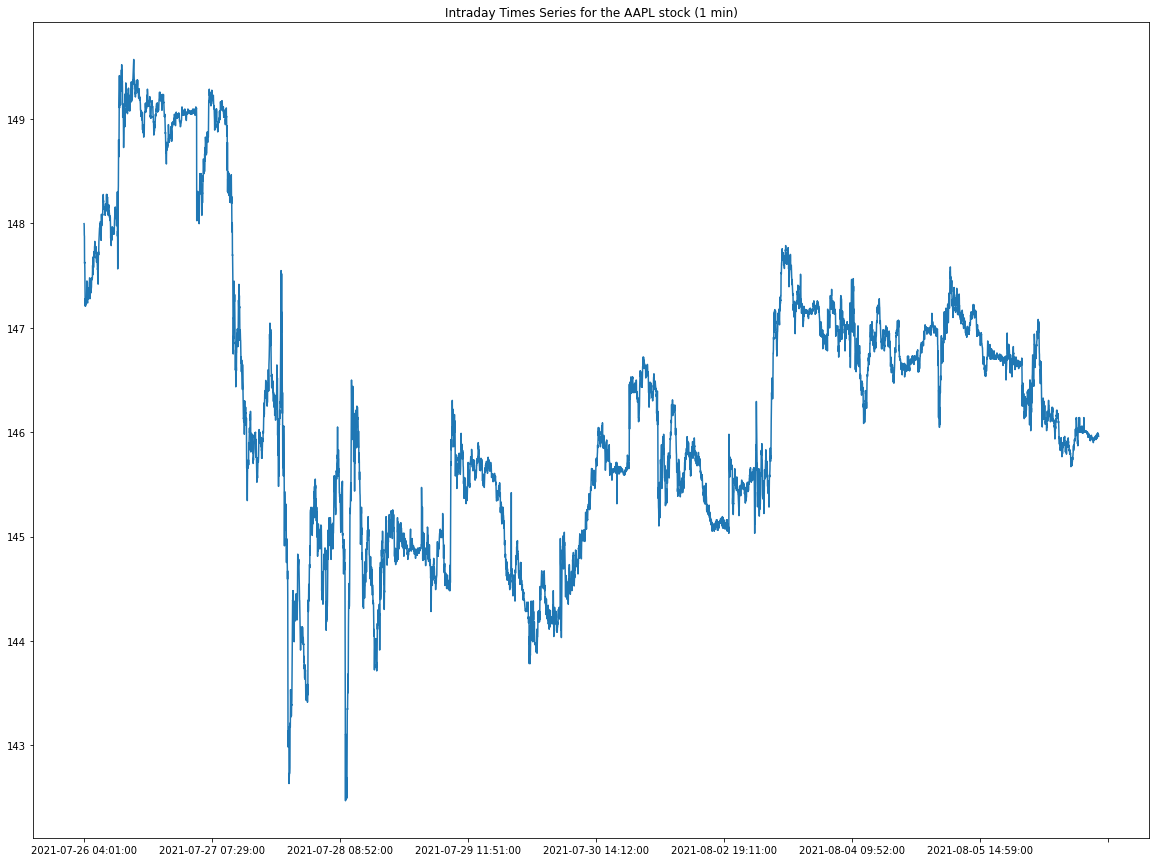

In [27]:
test.stockdata_df
test.plot_stockdata_single()

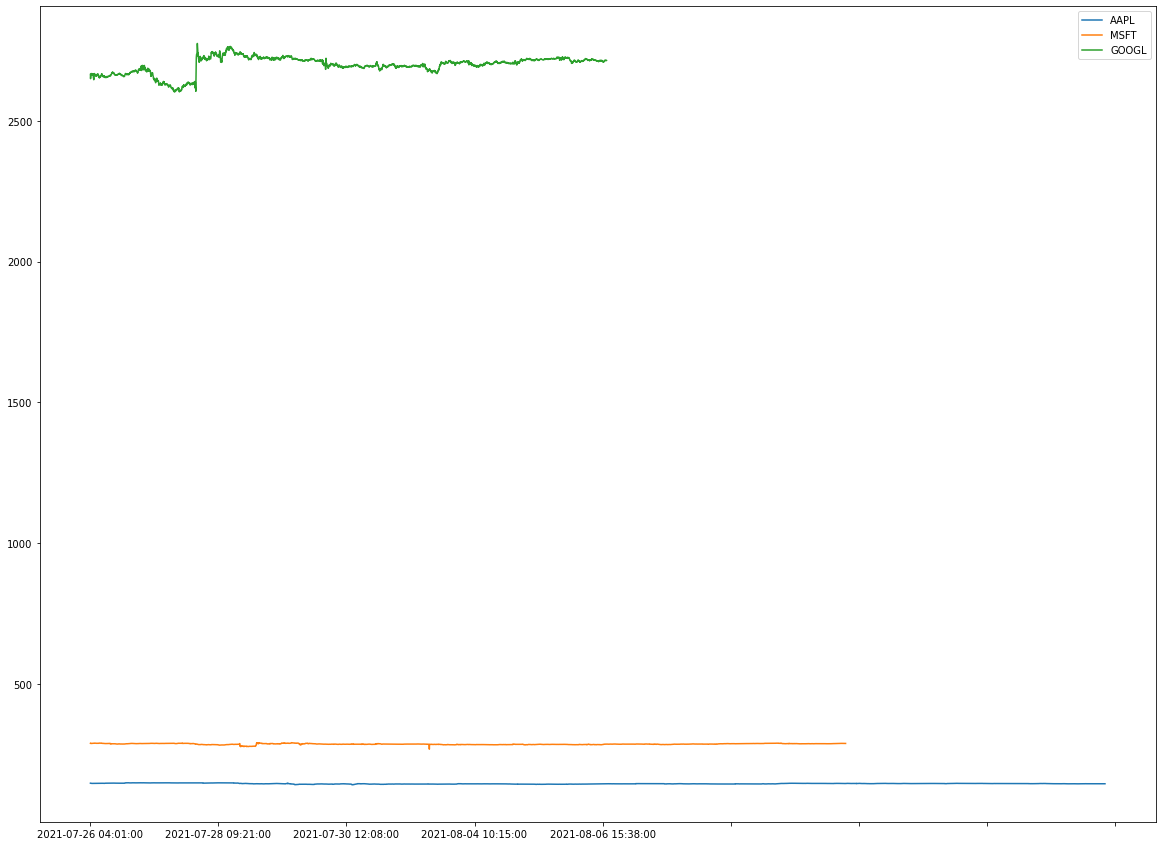

In [35]:
all_data = []
for stock in StockTickers:
    x = Stock(stock, path)
    x.read_intraday_data()
    all_data.append(x)
plot_stockdata_group(all_data)

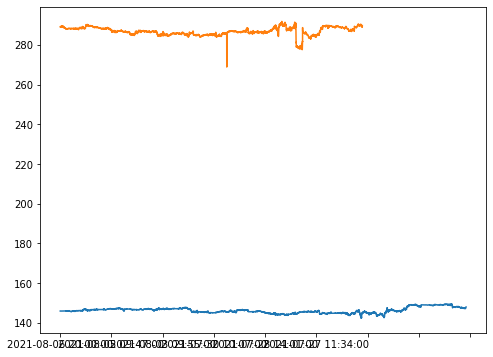

In [8]:
all_data[0].stockdata

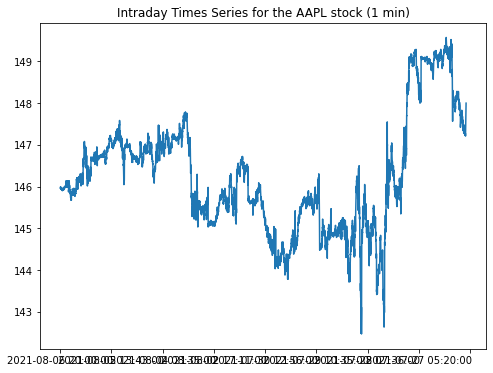

In [6]:
all_data[0].plot_stockdata_single()

In [2]:
aapl = Stock(StockTickers[0])
aapl.collect_intraday_data()
aapl.stockdata_df
aapl.plot_stockdata()

NameError: name 'StockTickers' is not defined

In [1]:
import datetime

In [15]:
x = datetime.datetime.today().strftime("%Y-%m-%d")
print(x)

2021-08-09
